In [62]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import binom
from matplotlib.ticker import MaxNLocator
from scipy.special import digamma
from scipy.special import gamma
from scipy.special import gammaln
% matplotlib inline

### Q1

In [164]:
def calPHI(x,theta,pi):
    Binom_Matrix = binom.pmf(x,20,theta).T * pi.T
    Binom_Vector = np.sum(Binom_Matrix,axis = 1).reshape((x.shape[0],1))
    PHI = Binom_Matrix/Binom_Vector
    
    return PHI

In [165]:
def update_n(PHI):
    return np.sum(PHI,axis = 0).T

In [166]:
def update_theta(PHI,x):
    
    return (np.sum(PHI * x.reshape((x.shape[0],1)),axis = 0)/(20 * np.sum(PHI,axis = 0))).reshape((PHI.shape[1],1))
    

In [167]:
def update_pi(n,x):
    return  n / x.shape[0]

In [168]:
def jointlikelihood(x,PHI,theta,pi):
    result = 0
    for i in range(x.shape[0]):
        for j in range(theta.shape[0]):
            result += PHI[i][j]*(x[i] * np.log(theta[j]) + (20 - x[i])*np.log(1-theta[j]) + np.log(pi[j]))
    return result

In [169]:
def EM(x,theta,pi,t,K):
    likelihood = np.zeros(t)
    for i in range(t):
        PHI = calPHI(x,theta,pi).reshape(x.shape[0],K)
        n = update_n(PHI)
        theta = update_theta(PHI,x).reshape(K,1)
        pi = update_pi(n,x).reshape(K,1)
        likelihood[i] = jointlikelihood(x,PHI,theta,pi)
        
    return theta,pi,likelihood,PHI

In [170]:
x = np.genfromtxt("X.csv")

In [171]:
K = 3
theta = np.array([[0.1,0.5,0.4]]).T
pi = np.zeros((K,1)) + 1/K
t = 50

theta1,pi1,likelihood1,PHI1 = EM(x,theta,pi,t,K)

In [172]:
K = 9
theta = np.array([[i * 0.08 for i in range(1,K+1)]]).T
pi = np.zeros((K,1)) + 1/K
t = 50

theta2,pi2,likelihood2,PHI2 = EM(x,theta,pi,t,K)

In [173]:
K = 15
theta = np.array([[i * 0.05 for i in range(1,K + 1)]]).T
pi = np.zeros((K,1)) + 1/K
t = 50

theta3,pi3,likelihood3,PHI3 = EM(x,theta,pi,t,K)

### b)

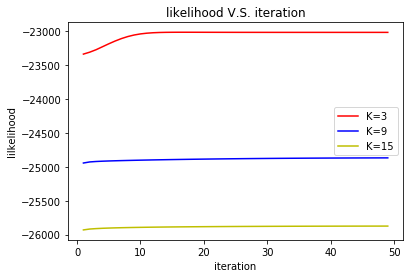

In [174]:
plt.plot(range(1,50),likelihood1[1:50],c = "r",label  = "K=3")
plt.plot(range(1,50),likelihood2[1:50],c = "b",label  = "K=9")
plt.plot(range(1,50),likelihood3[1:50],c = "y",label  = "K=15")
plt.xlabel("iteration")
plt.ylabel("lilkelihood")
plt.title("likelihood V.S. iteration")
plt.legend()

### c)

In [175]:
K = 3
Clusters1 = [[0 for i in range(K)] for i in range(21)]
for j in range(1,21):
    for i in range(x.shape[0]):
        if int(x[i]) == j:
            Clusters1[j][np.argmax(PHI1[i,:])] += 1
for i in range(len(Clusters1)):
    Clusters1[i] = np.argmax(Clusters1[i]) + 1

Text(0.5,1,'Clusters v.s. xi, K = 3')

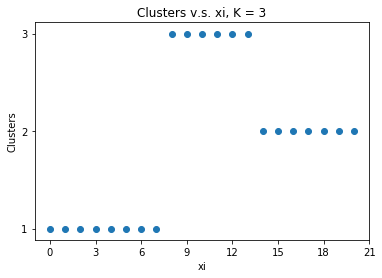

In [176]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.scatter(range(0,21),Clusters1)
plt.xlabel("xi")
plt.ylabel("Clusters")
plt.title("Clusters v.s. xi, K = 3")

In [194]:
K = 9
Clusters2 = [[0 for i in range(K)] for i in range(21)]
for j in range(0,21):
    for i in range(x.shape[0]):
        if int(x[i]) == j:
            Clusters2[j][np.argmax(PHI2[i,:])] += 1
for i in range(len(Clusters2)):
    Clusters2[i] = np.argmax(Clusters2[i]) + 1

Text(0.5,1,'Clusters v.s. xi,k = 9')

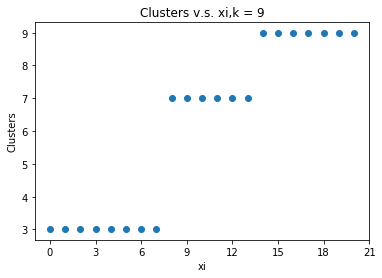

In [196]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.scatter(range(0,21),Clusters2)
plt.xlabel("xi")
plt.ylabel("Clusters")
plt.title("Clusters v.s. xi,k = 9")

In [192]:
K = 15
Clusters3 = [[0 for i in range(K)] for i in range(21)]
for j in range(0,21):
    for i in range(x.shape[0]):
        if int(x[i]) == j:
            Clusters3[j][np.argmax(PHI3[i,:])] += 1
for i in range(len(Clusters3)):
    Clusters3[i] = np.argmax(Clusters3[i]) + 1

Text(0.5,1,'Clusters v.s. xi, K = 15')

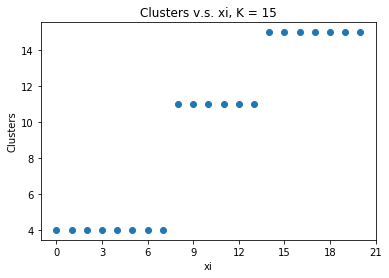

In [193]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.scatter(range(0,21),Clusters3)
plt.xlabel("xi")
plt.ylabel("Clusters")
plt.title("Clusters v.s. xi, K = 15")

### 2)

In [200]:
def E_PI(alpha_vec):
    
    return digamma(alpha_vec) - digamma(np.sum(alpha_vec,axis = 0))

In [201]:
def E_lnTheta(a_vec,b_vec):
    
    return digamma(a_vec) - digamma(a_vec + b_vec)

In [202]:
def E_lnOne_Min_Theta(a_vec,b_vec):
    
    return digamma(b_vec) - digamma(a_vec + b_vec)

In [203]:
def updatePHI(a_vec,b_vec,alpha_vec,x):
    e_PI = E_PI(alpha_vec)
    e_lnTheta = E_lnTheta(a_vec,b_vec)
    e_lnOne_Min_Theta = E_lnOne_Min_Theta(a_vec,b_vec)
    numerator = np.exp(x * e_lnTheta.T + (20 - x) * e_lnOne_Min_Theta.T + e_PI.T)
    denominator = np.sum(numerator,axis = 1).reshape((x.shape[0],1))

    return numerator / denominator

In [204]:
def update_N(PHI):
    
    return np.sum(PHI,axis = 0).reshape((PHI.shape[1],1))

In [205]:
def update_PI(alpha_vec,N):
    
    return alpha_vec + N

In [206]:
def update_theta(x,a0,b0,PHI):
    a_vecc = a0 + np.sum(x* PHI,axis = 0).reshape((PHI.shape[1],1))
    b_vecc = b0 + np.sum((20 - x) * PHI, axis = 0).reshape((PHI.shape[1],1))
    
    return a_vecc,b_vecc

In [207]:
def first_term(PHI,x,e_lnTheta,e_lnOne_Min_Theta):
    first = np.sum(x * PHI.dot(e_lnTheta),axis = 0)
    second = np.sum((20 - x) * PHI.dot(e_lnOne_Min_Theta),axis = 0)
    
    return (first + second)[0]

In [208]:
def second_term(PHI,e_PI):
    
    return np.sum(PHI.dot(e_PI),axis = 0)[0]

In [209]:
def thrid_term(a0,b0,e_lnTheta,e_lnOne_Min_Theta):
    term = gammaln(a0 + b0) - gammaln(a0) - gammaln(b0) + (a0 - 1) * \
    e_lnTheta + (b0 - 1) * e_lnOne_Min_Theta
    
    return np.sum(term,axis = 0)[0]

In [210]:
def fourth_term(alpha_0, e_PI):
    a = gammaln(np.sum(alpha_0))
    b = np.sum(gammaln(alpha_0),axis = 0)
    c = np.sum(e_PI * (alpha0 - 1),axis = 0)
    
    return (a - b + c)[0]

In [211]:
def fifth_term(alpha_vec, e_PI):
    a = gammaln(np.sum(alpha_vec))
    b = np.sum(gammaln(alpha_vec),axis = 0)
    c = np.sum(e_PI * (alpha_vec - 1),axis = 0)
    
    return (a - b + c)[0]

In [212]:
def sixth_term(PHI):
    
    return np.sum(np.sum(PHI*np.log(PHI),axis = 0),axis = 0)

In [213]:
def seventh_term(a_vec,b_vec,e_lnTheta,e_lnOne_Min_Theta):
    item  = (a_vec - 1) * e_lnTheta + (b_vec - 1) * e_lnOne_Min_Theta + gammaln(a_vec + b_vec) - \
    gammaln(a_vec)-gammaln(b_vec)
    return np.sum(item)

In [214]:
def VI(x,a0,b0,alpha0,a_vec,b_vec,alpha_vec,t):
    objective = []
    PHI = np.random.random((x.shape[0],a_vec.shape[0]))
    for i in range(t):

        N = update_N(PHI)
        alpha_vec = update_PI(alpha0,N)
        a_vec,b_vec = update_theta(x,a_vec,b_vec,PHI)
        
        e_PI = E_PI(alpha_vec)
        e_lnTheta = E_lnTheta(a_vec,b_vec)
        e_lnOne_Min_Theta = E_lnOne_Min_Theta(a_vec,b_vec)
        PHI = updatePHI(a_vec,b_vec,alpha_vec,x)
        
        first = first_term(PHI,x,e_lnTheta,e_lnOne_Min_Theta)
        second = second_term(PHI,e_PI)
        third = thrid_term(a0,b0,e_lnTheta,e_lnOne_Min_Theta)
        fourth = fourth_term(alpha0, e_PI)
        fifth = fifth_term(alpha_vec, e_PI)
        sixth = sixth_term(PHI)
        seventh = seventh_term(a_vec,b_vec,e_lnTheta,e_lnOne_Min_Theta)
        
        
        objective.append(first + second + third + fourth - fifth - sixth - seventh)
        
        
    return PHI,N,alpha_vec,a_vec,b_vec,objective

### b)

In [215]:
K = 3
x = x.reshape((x.shape[0],1))
t = 1000

alpha_vec = np.ones((K,1))*0.1
alpha0 = np.ones((K,1))*0.1
a_vec = np.ones((K,1))*0.5
b_vec= np.ones((K,1))*0.5
a0 = 0.5
b0 = 0.5

PHI1,N1,alpha_vec1,a_vec1,b_vec1,objective1 =VI(x,a0,b0,alpha0,a_vec,b_vec,alpha_vec,t)

In [216]:
K = 15
x = x.reshape((x.shape[0],1))
t = 1000

alpha_vec = np.ones((K,1))*0.1
alpha0 = np.ones((K,1))*0.1
a_vec = np.ones((K,1))*0.5
b_vec= np.ones((K,1))*0.5
a0 = 0.5
b0 = 0.5

PHI2,N2,alpha_vec2,a_vec2,b_vec2,objective2 =VI(x,a0,b0,alpha0,a_vec,b_vec,alpha_vec,t)

In [217]:
K = 50
x = x.reshape((x.shape[0],1))
t = 1000

alpha_vec = np.ones((K,1))*0.1
alpha0 = np.ones((K,1))*0.1
a_vec = np.ones((K,1))*0.5
b_vec= np.ones((K,1))*0.5
a0 = 0.5
b0 = 0.5

PHI3,N3,alpha_vec3,a_vec3,b_vec3,objective3 =VI(x,a0,b0,alpha0,a_vec,b_vec,alpha_vec,t)

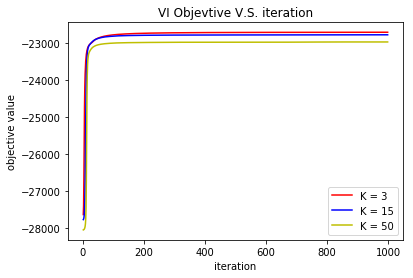

In [218]:
plt.plot(range(1,1000),objective1[1:1000],c='r',label = "K = 3")
plt.plot(range(1,1000),objective2[1:1000],c="b",label = "K = 15")
plt.plot(range(1,1000),objective3[1:1000],c="y",label = "K = 50")
plt.xlabel("iteration")
plt.ylabel("objective value")
plt.title("VI Objevtive V.S. iteration")
plt.legend()

### c)

Text(0.5,1,'Clusters v.s. xi, K = 3')

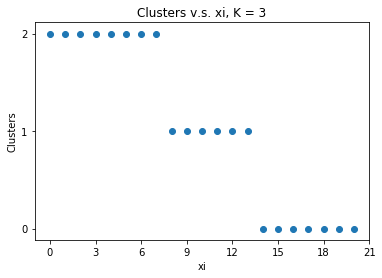

In [222]:
K = 3
Clusters1 = [[0 for i in range(K)] for i in range(21)]
for j in range(0,21):
    for i in range(x.shape[0]):
        if int(x[i]) == j:
            Clusters1[j][np.argmax(PHI1[i,:])] += 1
for i in range(len(Clusters1)):
    Clusters1[i] = np.argmax(Clusters1[i])
    
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.scatter(range(0,21),Clusters1)
plt.xlabel("xi")
plt.ylabel("Clusters")
plt.title("Clusters v.s. xi, K = 3")

Text(0.5,1,'Clusters v.s. xi, K = 15')

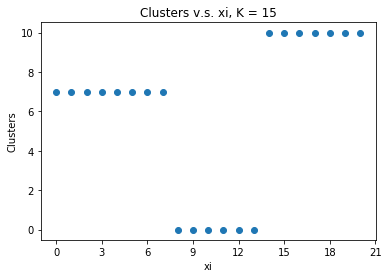

In [229]:
K = 15
Clusters2 = [[0 for i in range(K)] for i in range(21)]
for j in range(0,21):
    for i in range(x.shape[0]):
        if int(x[i]) == j:
            Clusters2[j][np.argmax(PHI2[i,:])] += 1
for i in range(len(Clusters2)):
    Clusters2[i] = np.argmax(Clusters2[i])
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.scatter(range(0,21),Clusters2)
plt.xlabel("xi")
plt.ylabel("Clusters")
plt.title("Clusters v.s. xi, K = 15")

Text(0.5,1,'Clusters v.s. xi, K = 50')

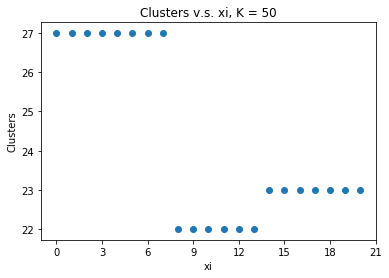

In [235]:
K = 50
Clusters3 = [[0 for i in range(K)] for i in range(21)]
for j in range(0,21):
    for i in range(x.shape[0]):
        if int(x[i]) == j:
            Clusters3[j][np.argmax(PHI3[i,:])] += 1
for i in range(len(Clusters3)):
    Clusters3[i] = np.argmax(Clusters3[i])
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.scatter(range(0,21),Clusters3)
plt.xlabel("xi")
plt.ylabel("Clusters")
plt.title("Clusters v.s. xi, K = 50")

### 3)

In [258]:
from scipy.stats import binom
from scipy.special import beta
from scipy.special import comb
from scipy.stats import beta

In [259]:
def cal_theta(X, d,a0,b0):
    kt = len(d.keys())
    theta = np.ones(kt)
    a = np.ones(kt)
    b = np.ones(kt)
    for i in range(kt):
        a[i] = np.sum(X[d['c_%d' %i ]['name']]) + a0
        b[i] = np.sum(20-X[d['c_%d' %i ]['name']]) +b0
    theta = beta.rvs(a, b)
    return theta

In [260]:
def cal_n(kt, d):
    n = []
    for i in range(kt):
        n.append([len(d['c_%d' %i]['name'])])
    n = np.array(n)
    
    return n

In [261]:
def reindex(d):
    kt = len(d.keys())
    i = 0
    while i < kt:
        if d['c_%d' %i ]['name'] == []:
            d['c_%d' %i ]['name'] = d['c_%d' %(kt-1)]['name']
            del d['c_%d' %(kt-1)]
            kt = kt-1
        i +=1
    return d, kt

In [262]:
def cal_phi(X, theta, d, alpha, i, kt, N):
    n = cal_n(kt, d)   
    phi = binom.pmf(k = X[i], n = 20, p = theta)*(n.T)/(alpha+N-1)
    phi = phi.flatten()
    phi_prime = 0
    phi_prime = alpha/(alpha+N-1)/kt*np.sum(binom.pmf(k = X[i], n = 20, p = theta))
    phi = np.append(phi,phi_prime)
    total = np.sum(phi)
    phi = phi/total
    
    return phi

In [263]:
def cal_all_phi(X, theta, d, alpha):
    n = []
    kt = len(d.keys())
    for i in range(kt):
        n.append([len(d['c_%d' %i]['name'])])        
    phi=[0 for i in range(N) for i in range(kt)]
    phi_prime=[0 for i in range(N)]
    for i in range(N):
        phi[i] = binom.pmf(k = X[i], n = 20, p = theta)*n/(alpha+N-1)
        phi_prime[i] = alpha/(alpha+N-1)/kt*np.sum(binom.pmf(k = X[i], n = 20, p = theta))
        
    return phi,phi_prime

In [264]:
def init_clusters(X, N = 2000, num_cluster = 30,a0 = 0.5,b0 = 0.5):
    d ={}
    for i in range(num_cluster):
        d['c_%d' %i ]= {}
    for i in range(num_cluster):
        d['c_%d' %i ]['name'] = []
    rand_assign = np.random.choice(num_cluster, N, p=[1/num_cluster for i in range(30)])
    for index, i in enumerate(rand_assign):
        d['c_%d' %i ]['name'].append(index)    
    theta = cal_theta(X, d,a0,b0)
    
    return d, theta

In [265]:
def add(d, index_add, kt):
    d['c_%d' %kt] = {}
    d['c_%d' %kt]['name'] = [index_add]
    return d

In [266]:
def remove(d, index_remove, kt):
    for i in range(kt):
        if index_remove in d['c_%d' %i ]['name']:
            d['c_%d' %i ]['name'].remove(index_remove)
    return d

In [270]:
def gibbs(T,a0,b0,alpha):
    alpha = 3/4
    d, theta = init_clusters(X)    
    plot = {}
    for i in range(6):
        plot['mostprobable_%d' %(i+1)]= []    
    clusters = []
    
    for iter in range(T):
        clusters.append(len(d.keys()))       
        n = cal_n(len(d.keys()), d)
        n = n.tolist()
        n = np.sort(n, axis = None)
        if len(n) > 6:
            for i in range(6):
                plot['mostprobable_%d' %(i+1)].append((n[-(i+1)]))
        else:
            for i in range(len(n)):
                plot['mostprobable_%d' %(i+1)].append(n[-(i+1)])
            for i in range(len(n),6):
                plot['mostprobable_%d' %(i+1)].append(0)                
        for i in range(N):
            d, kt = reindex(d)
            d = remove(d, i, kt)
            theta = cal_theta(X, d,a0,b0)
            phi = cal_phi(X, theta, d, alpha, i, kt, N)
            c = np.random.choice(len(phi), p = list(phi))
            if c == (len(phi)-1):
                d = add(d, i, kt)
            else:
                d['c_%d'%c]['name'].append(i)
    
    return clusters, plot

### b)

In [271]:
X = np.genfromtxt('X.csv')
N = X.shape[0]
a0 = b0 = 0.5
alpha = 0.1
T=1000

In [272]:
clusters, plot = gibbs(T,a0,b0,alpha)

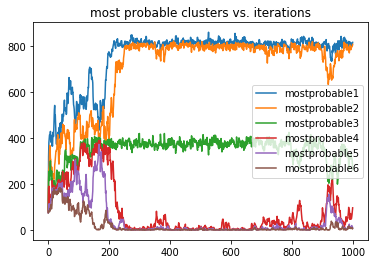

In [273]:
plt.plot(plot['mostprobable_1'], label = 'mostprobable1')
plt.plot(plot['mostprobable_2'], label = 'mostprobable2')
plt.plot(plot['mostprobable_3'], label = 'mostprobable3')
plt.plot(plot['mostprobable_4'], label = 'mostprobable4')
plt.plot(plot['mostprobable_5'], label = 'mostprobable5')
plt.plot(plot['mostprobable_6'], label = 'mostprobable6')
plt.title("most probable clusters vs. iterations")
plt.legend()
plt.show()

### c)

Text(0.5,1,'number of clusters vs. iterations')

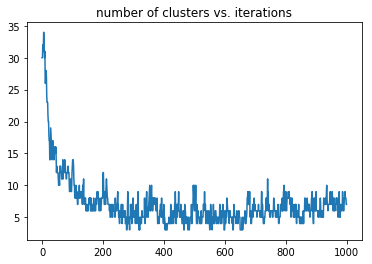

In [274]:
plt.plot(clusters)
plt.title("number of clusters vs. iterations")